In [18]:
import pandas as pd
import numpy as np
# Reading the CSV file
df = pd.read_csv("Iris.csv")

# Printing top 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking Duplicates
data = df.drop_duplicates(subset ="Species",)
print(data)
# See if the dataset is balanced or not i.e. all the species contain equal amounts of rows or not
df.value_counts("Species")

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
50    51            7.0           3.2            4.7           1.4   
100  101            6.3           3.3            6.0           2.5   

             Species  
0        Iris-setosa  
50   Iris-versicolor  
100   Iris-virginica  


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

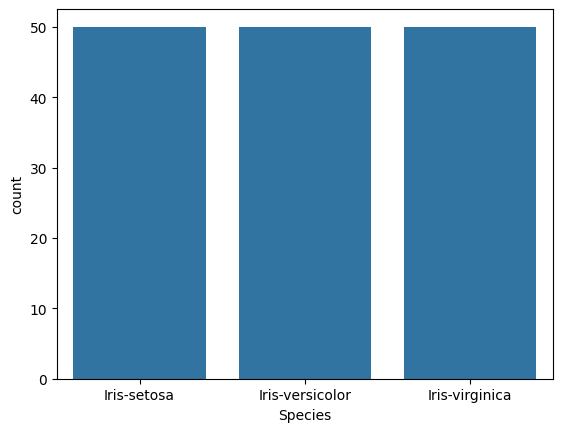

In [5]:
# Visualizing the target column
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Species', data=df)
plt.show()

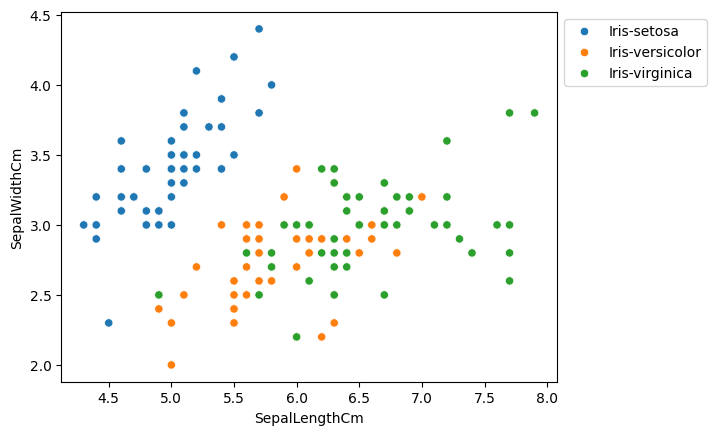

In [6]:
# Relation between variables
#Comparing Sepal Length and Sepal Width
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

From the above plot, we can infer that - 

Species Setosa has smaller sepal lengths but larger sepal widths.
Versicolor Species lies in the middle of the other two species in terms of sepal length and width
Species Virginica has larger sepal lengths but smaller sepal widths.

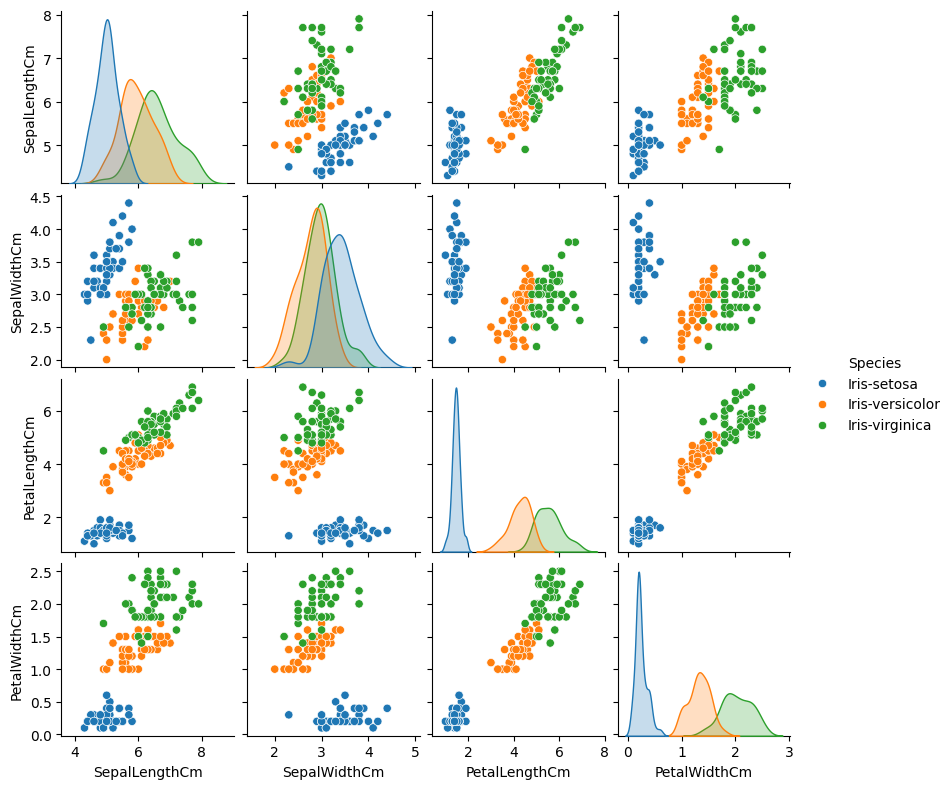

In [8]:
# Let's plot all the column's relationships using a pairplot. It can be used for multivariate analysis.
sns.pairplot(df.drop(['Id'], axis = 1), 
             hue='Species', height=2)

c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

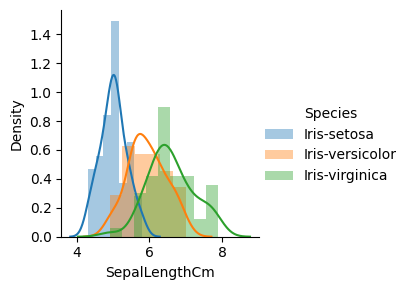

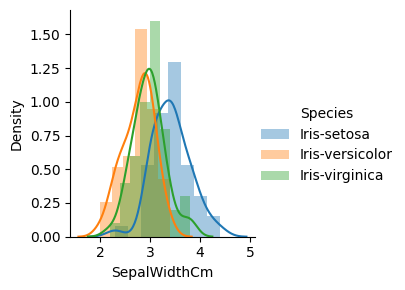

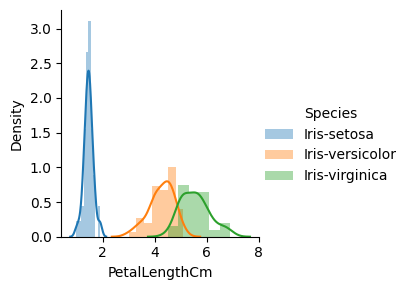

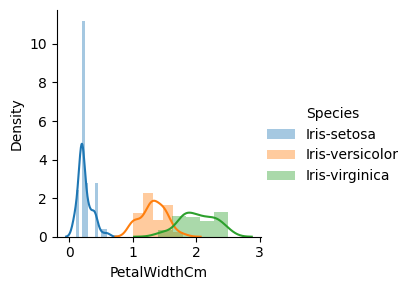

In [12]:
# Histograms with Distplot Plot
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalLengthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "SepalWidthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalLengthCm").add_legend()

plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.distplot, "PetalWidthCm").add_legend()

plt.show()

From the above plots, we can see that - 

In the case of Sepal Length, there is a huge amount of overlapping.
In the case of Sepal Width also, there is a huge amount of overlapping.
In the case of Petal Length, there is a very little amount of overlapping.
In the case of Petal Width also, there is a very little amount of overlapping.
So we can use Petal Length and Petal Width as the classification feature

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.624413     -0.654654       0.969909   
SepalLengthCm  0.624413       1.000000     -0.999226       0.795795   
SepalWidthCm  -0.654654      -0.999226      1.000000      -0.818999   
PetalLengthCm  0.969909       0.795795     -0.818999       1.000000   
PetalWidthCm   0.999685       0.643817     -0.673417       0.975713   

               PetalWidthCm  
Id                 0.999685  
SepalLengthCm      0.643817  
SepalWidthCm      -0.673417  
PetalLengthCm      0.975713  
PetalWidthCm       1.000000  


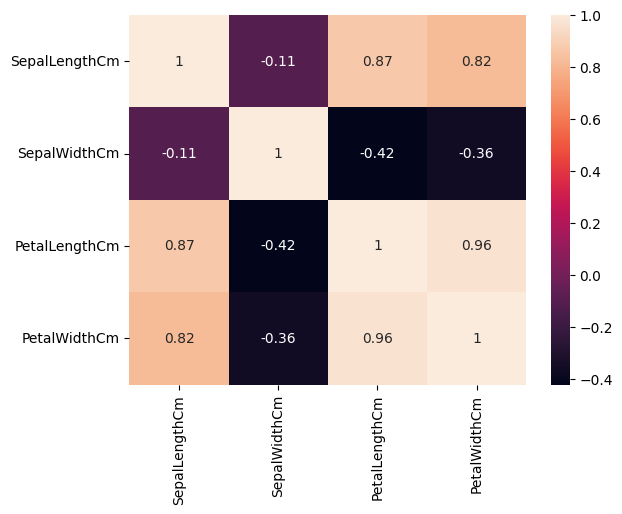

In [15]:
# Handling Correlation
print(data.select_dtypes(include=['number']).corr(method='pearson'))

# Heatmap for Correlation
sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson').drop( 
['Id'], axis=1).drop(['Id'], axis=0), 
			annot = True); 

plt.show()


From the above graph, we can see that -

Petal width and petal length have high correlations. 
Petal length and sepal width have good correlations.
Petal Width and Sepal length have good correlations.

<Axes: xlabel='SepalWidthCm'>

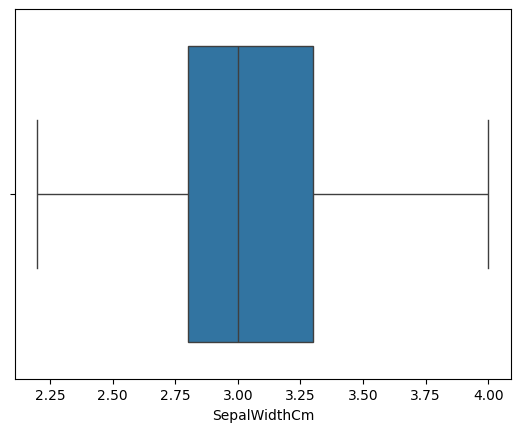

In [20]:
# Handling Outliers
sns.boxplot(x='SepalWidthCm', data=df)


Old Shape:  (146, 6)
New Shape:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

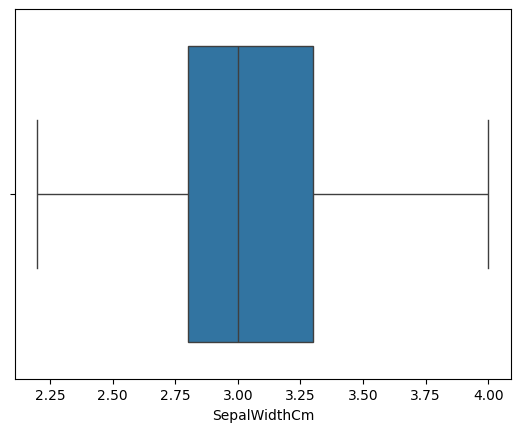

In [23]:
#In the above graph, the values above 4 and below 2 are acting as outliers.

# Removing Outliers
# IQR 
Q1 = np.percentile(df['SepalWidthCm'], 25, 
				interpolation = 'midpoint') 

Q3 = np.percentile(df['SepalWidthCm'], 75, 
				interpolation = 'midpoint') 
IQR = Q3 - Q1 

print("Old Shape: ", df.shape) 

# Upper bound 
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR)) 

# Lower bound 
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR)) 

# Removing the Outliers 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 

print("New Shape: ", df.shape) 
sns.boxplot(x='SepalWidthCm', data=df)